In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Exercise_Record.csv')

In [3]:
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01',110,130,409.1
1,60,2020/12/02',117,145,479.0
2,60,2020/12/03',103,135,340.0
3,45,2020/12/04',109,175,282.4
4,45,2020/12/05',117,148,406.0


In [4]:
df['Pulse'].describe()

count     32.000000
mean     103.500000
std        7.832933
min       90.000000
25%      100.000000
50%      102.500000
75%      106.500000
max      130.000000
Name: Pulse, dtype: float64

# Numerical analysis and visualization

In [6]:
df['Maxpulse'].describe()

count     32.000000
mean     128.500000
std       12.998759
min      101.000000
25%      120.000000
50%      127.500000
75%      132.250000
max      175.000000
Name: Maxpulse, dtype: float64

In [7]:
df['Maxpulse'].mean()

128.5

In [8]:
df['Maxpulse'].median()

127.5

<AxesSubplot: >

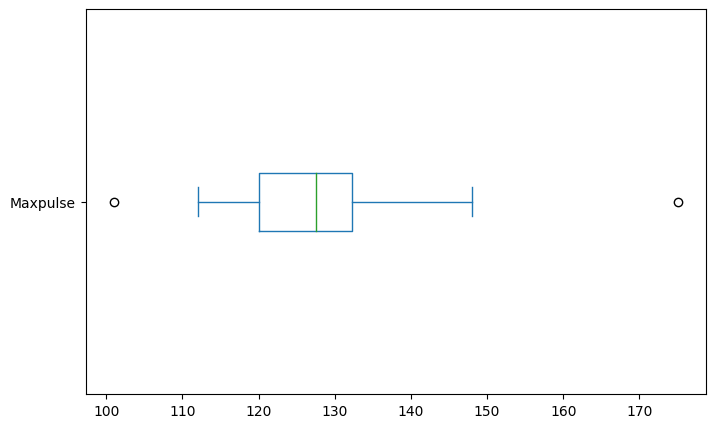

In [9]:
df['Maxpulse'].plot(kind='box',vert=False, figsize=(8,5))

# kde - Kernel Density Estimation

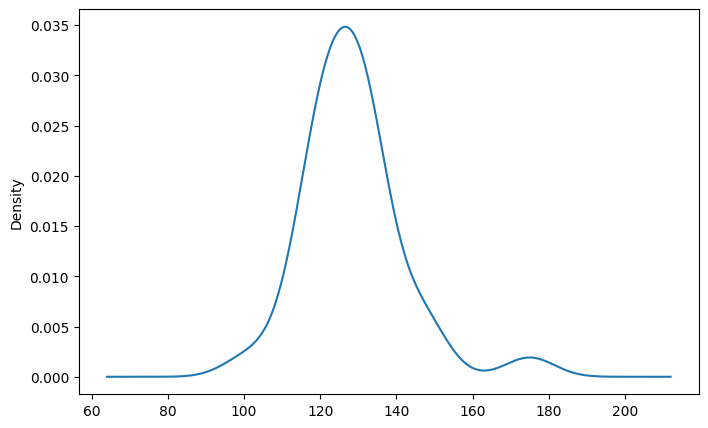

In [10]:
ax = df['Maxpulse'].plot(kind='density',figsize=(8,5)) # kde
ax.axvline(df['Maxpulse'].mean())


In [ ]:
data = [1,2,3]
import pandas as pd
dt= pd.DataFrame(data)

In [ ]:
dt

In [ ]:
type(dt)

In [ ]:
tot = 0
def func(*args):

    for arg in args:
        tot+=arg
print(f"Total:{tot}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([-3, -2,-1, 0, 1, 2,3])
y = x**2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')

#plt.show()


In [ ]:
y

In [ ]:
import matplotlib.pyplot as plt

# data
values = [12, 23, 34, 45, 56, 67, 78, 89, 90]

# create stem plot
plt.stem(values)
plt.show()
